# Introduction to OOP in Python, Part 3b

### Abstract Base Classes
There are occasions when you need to write a class definition that is only partially complete such that it needs to be sub-classed before it becomes usable.
 
One can enforce such *Abstract Base Class* behaviour by utilizing the **ABCMeta** metaclass and the **@abstractmethod** decorator from the **abc** module as follows:

    from abc import ABCMeta, abstractmethod

    class ExpressionTree(TreeNode,metaclass=ABCMeta):
        .
        .
        #other code here
        .
        .
        @abstractmethod
        def evaluate(self,data=None):
            pass
    
        @abstractmethod
        def mutate(self):
            pass


*Metaclasses* are beyond the scope of this tutorial, but they essentially control the behaviour of or act as templates for class definitions in the same way that class definitions act as templates for objects.
 
Notice that we are now prevented from instantiating the ExpressionTree class:

In [1]:
from mylib.ExpressionTree import ExpressionTree

TreeNode has loaded


In [2]:
et = ExpressionTree('Root')

TypeError: Can't instantiate abstract class ExpressionTree with abstract methods evaluate, mutate

Let's create a subclass that represents a constant value leaf node

In [3]:
import numpy as np

class ConstLeafNode(ExpressionTree):
    
    arity = 0 # leaf nodes have no children :-(
    
    def __init__(self,parent=None,**kwargs):
        v = kwargs.get('value',1.0)
        super().__init__(f'{v:0.2f}',parent)
        self._value = v
    
    def evaluate(self,data=None):
        return self._value
    
    def mutate(self):
        self._value = np.random.uniform(-1.0,1.0)
        self.name = f'{self._value:0.2f}'
        

we're using <code>**kwargs</code> to allow an arbitrary number of named parameters

In [4]:
c1 = ConstLeafNode(value=3.14)

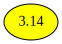

In [5]:
c1.plot()

In [6]:
c1.name

'3.14'

In [7]:
c1._value

3.14

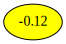

In [8]:
c1.mutate()
c1.plot()

In [9]:
c1.evaluate()

-0.11540706818074176

In [10]:
c1.arity

0

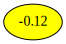

In [11]:
c1.grow()
c1.plot()

In [12]:
ExpressionTree.__subclasses__()

[__main__.ConstLeafNode]

In [13]:
class VarLeafNode(ExpressionTree):
    
    arity = 0 # leaf nodes have no children :-(
    
    def __init__(self,parent=None,**kwargs):
        self.varList = kwargs.get('varList',['x1'])
        v = np.random.choice(self.varList)
        super().__init__(v,parent)
        self.value = np.NaN
    
    def evaluate(self,data=None):
        if data is None:
            self.value = np.NaN
            return np.NaN
        else:
            self.value = data[self.name]
            return data[self.name]
    
    def mutate(self):
        v = np.random.choice(self.varList)
        self.name = v
        

In [14]:
v1 = VarLeafNode(varList=['x1','x2','x3'])

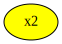

In [15]:
v1.plot()

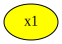

In [17]:
#re-run cell until different
v1.mutate()
v1.plot()

In [18]:
data = {'x1':1,'x2':2,'x3':3}

In [19]:
v1.evaluate(data)

1

In [20]:
v1.mutate()
v1.evaluate(data)

3

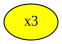

In [21]:
v1.plot()

In [22]:
class BinaryFuncPlus(ExpressionTree):
    
    arity = 2 # v = left + right
    
    def __init__(self,parent=None,**kwargs):
        super().__init__('+',parent)
        self.value = np.NaN
    
    def evaluate(self,data=None):
        if data is None:
            self.value = np.NaN
            return np.NaN
        else:
            self.value = self.left.evaluate(data)+self.right.evaluate(data)
            return self.value
    
    def mutate(self):
        pass
        

In [23]:
b1 = BinaryFuncPlus()

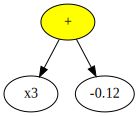

In [24]:
b1.left = v1
b1.right = c1
b1.plot()

In [25]:
b1.evaluate(data)

2.8845929318192582

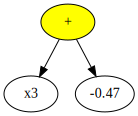

In [26]:
b1.right.mutate()
b1.plot()

In [27]:
b1.evaluate(data)

2.5279505407618172

In [28]:
b1.getMaxdFromRoot

2

### Things we need to fix:
* complete binary operators to include -, * and /
* make a better *grow method* that can cope with the new subclasses
* make mutate operate at the level of the entire tree
* modify the *evaluate method* to allow the use of arrays

### Next time...